In [1]:
import sys
sys.path.append("/home/ferrari/anaconda3/lib/python3.7/site-packages/")
from adjustText import adjust_text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as st
import pymc3 as pm
import RELACS as rel
import matplotlib
import matplotlib.cm as cm
from matplotlib import colors
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: Run

# Perform differential peak analysis between EPZ and DMSO treated cells for each histone modification 

# NPC48h

In [10]:
%%bash

### compute global scaling factors based on Input representation ###

multiBamSummary BED-file -b /data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep1_Input.filtered.bam \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep2_Input.filtered.bam \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_EPZ_rep1_Input.filtered.bam \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_EPZ_rep2_Input.filtered.bam \
-o ../INTERMEDIATE_FILES/Input/Input_iNPC_counts.mat.gz --BED ../../figure_1/INTERMEDIATE_FILES/EnrichedRegions_allMarks_normed_binned.bed \
-bl /home/ferrari/ferrari/my_repository/blacklist_ChIP-Seq/GRCm38_General_readAttractingRegions.UseThisOne_DKFZ.bed \
-p 20 \
--outRawCounts ../INTERMEDIATE_FILES/Input/Input_iNPC_counts.counts -e --minMappingQuality 3

Number of bins found: 250743


In [17]:
inp = pd.read_csv("../INTERMEDIATE_FILES/Input/Input_iNPC_counts.counts",sep="\t")
inp = rel.preprocess_deeptools(inp)
rel.RLE(inp)[0]

'iNPC_DMSO_rep1_Input.filtered.bam'    0.639101
'iNPC_DMSO_rep2_Input.filtered.bam'    1.149876
'iNPC_EPZ_rep1_Input.filtered.bam'     1.142933
'iNPC_EPZ_rep2_Input.filtered.bam'     1.313529
dtype: float64

In [20]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K4me3 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K4me3_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K4me3_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me3/

bams: 0.639101 1.149876 1.142933 1.313529
mark: H3K4me3
outdir: ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me3/
2020-02-01 14:06:20 [INFO] - Started UROPA
2020-02-01 14:06:20 [INFO] - Working directory: /data/manke/group/ferrari/PhD_project/reproducible_code_paper/code_paper/figure_4/NOTEBOOKS
2020-02-01 14:06:20 [INFO] - Command-line call: /home/ferrari/anaconda3/envs/uropa/bin/uropa -b ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me3//peaks_Annotation.bed -g /home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf --feature transcript --distance 1500 --internals 1 -o ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me3//output_uropa -t 10 --show_attributes gene_id transcript_id gene_name gene_type transcript_type
2020-02-01 14:06:20 [INFO] - Reading configuration from commandline/input config
2020-02-01 14:06:20 [INFO] - Reading .bed-file to annotate
2020-02-01 14:06:20 [INFO] - Preparing .gtf-file for fast access
2020-02-0

[E::hts_open_format] Failed to open file 0.639101
The file '0.639101' does not exist
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapp

In [21]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K27ac #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K27ac_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K27ac_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27ac

bams: 0.639101 1.149876 1.142933 1.313529
mark: H3K27ac
outdir: ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27ac
2020-02-01 14:12:02 [INFO] - Started UROPA
2020-02-01 14:12:02 [INFO] - Working directory: /data/manke/group/ferrari/PhD_project/reproducible_code_paper/code_paper/figure_4/NOTEBOOKS
2020-02-01 14:12:02 [INFO] - Command-line call: /home/ferrari/anaconda3/envs/uropa/bin/uropa -b ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27ac/peaks_Annotation.bed -g /home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf --feature transcript --distance 1500 --internals 1 -o ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27ac/output_uropa -t 10 --show_attributes gene_id transcript_id gene_name gene_type transcript_type
2020-02-01 14:12:02 [INFO] - Reading configuration from commandline/input config
2020-02-01 14:12:02 [INFO] - Reading .bed-file to annotate
2020-02-01 14:12:02 [INFO] - Preparing .gtf-file for fast access
2020-02-01 1

[E::hts_open_format] Failed to open file 0.639101
The file '0.639101' does not exist
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapp

In [22]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K4me1 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K4me1_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K4me1_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me1

bams: 0.639101 1.149876 1.142933 1.313529
mark: H3K4me1
outdir: ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me1
2020-02-01 14:17:12 [INFO] - Started UROPA
2020-02-01 14:17:12 [INFO] - Working directory: /data/manke/group/ferrari/PhD_project/reproducible_code_paper/code_paper/figure_4/NOTEBOOKS
2020-02-01 14:17:12 [INFO] - Command-line call: /home/ferrari/anaconda3/envs/uropa/bin/uropa -b ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me1/peaks_Annotation.bed -g /home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf --feature transcript --distance 1500 --internals 1 -o ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me1/output_uropa -t 10 --show_attributes gene_id transcript_id gene_name gene_type transcript_type
2020-02-01 14:17:12 [INFO] - Reading configuration from commandline/input config
2020-02-01 14:17:12 [ERROR] - File ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me1/peaks_Annotation.bed does not exist.
Namespace(AFTER_

[E::hts_open_format] Failed to open file 0.639101
The file '0.639101' does not exist
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapp

CalledProcessError: Command 'b'\n### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###\n# H3K4me1 #\n\n./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K4me1_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K4me1_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K4me1\n'' returned non-zero exit status 1.

In [23]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K36me3 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K36me3_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K36me3_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K36me3

bams: 0.639101 1.149876 1.142933 1.313529
mark: H3K36me3
outdir: ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K36me3
2020-02-01 14:20:55 [INFO] - Started UROPA
2020-02-01 14:20:55 [INFO] - Working directory: /data/manke/group/ferrari/PhD_project/reproducible_code_paper/code_paper/figure_4/NOTEBOOKS
2020-02-01 14:20:55 [INFO] - Command-line call: /home/ferrari/anaconda3/envs/uropa/bin/uropa -b ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K36me3/peaks_Annotation.bed -g /home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf --feature transcript --distance 1500 --internals 1 -o ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K36me3/output_uropa -t 10 --show_attributes gene_id transcript_id gene_name gene_type transcript_type
2020-02-01 14:20:55 [INFO] - Reading configuration from commandline/input config
2020-02-01 14:20:55 [ERROR] - File ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K36me3/peaks_Annotation.bed does not exist.
Namespace(A

[E::hts_open_format] Failed to open file 0.639101
The file '0.639101' does not exist
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapp

CalledProcessError: Command 'b'\n### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###\n# H3K36me3 #\n\n./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K36me3_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K36me3_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K36me3\n'' returned non-zero exit status 1.

In [10]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K27me3 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K27me3_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K27me3_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27me3

bams: 0.639101 1.149876 1.142933 1.313529
mark: H3K27me3
outdir: ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27me3
2020-02-01 14:42:08 [INFO] - Started UROPA
2020-02-01 14:42:08 [INFO] - Working directory: /data/manke/group/ferrari/PhD_project/reproducible_code_paper/code_paper/figure_4/NOTEBOOKS
2020-02-01 14:42:08 [INFO] - Command-line call: /home/ferrari/anaconda3/envs/uropa/bin/uropa -b ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27me3/peaks_Annotation.bed -g /home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf --feature transcript --distance 1500 --internals 1 -o ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27me3/output_uropa -t 10 --show_attributes gene_id transcript_id gene_name gene_type transcript_type
2020-02-01 14:42:08 [INFO] - Reading configuration from commandline/input config
2020-02-01 14:42:08 [ERROR] - File ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27me3/peaks_Annotation.bed does not exist.
Namespace(A

[E::hts_open_format] Failed to open file 0.639101
The file '0.639101' does not exist
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapp

CalledProcessError: Command 'b'\n### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###\n# H3K27me3 #\n\n./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K27me3_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K27me3_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27me3\n'' returned non-zero exit status 1.

In [11]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K9me3 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K9me3_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K9me3_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K9me3

bams: 0.639101 1.149876 1.142933 1.313529
mark: H3K9me3
outdir: ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K9me3
2020-02-01 14:45:25 [INFO] - Started UROPA
2020-02-01 14:45:25 [INFO] - Working directory: /data/manke/group/ferrari/PhD_project/reproducible_code_paper/code_paper/figure_4/NOTEBOOKS
2020-02-01 14:45:25 [INFO] - Command-line call: /home/ferrari/anaconda3/envs/uropa/bin/uropa -b ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K9me3/peaks_Annotation.bed -g /home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf --feature transcript --distance 1500 --internals 1 -o ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K9me3/output_uropa -t 10 --show_attributes gene_id transcript_id gene_name gene_type transcript_type
2020-02-01 14:45:25 [INFO] - Reading configuration from commandline/input config
2020-02-01 14:45:25 [ERROR] - File ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K9me3/peaks_Annotation.bed does not exist.
Namespace(AFTER_

[E::hts_open_format] Failed to open file 0.639101
The file '0.639101' does not exist
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapp

CalledProcessError: Command 'b'\n### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###\n# H3K9me3 #\n\n./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_NPC48h_EPZvsDMSO/info_data_H3K9me3_EPZvsDMSO.txt ../../figure_1/INPUT_DATA/NPC48h_H3K9me3_BAMPE-BAM_consensusPeaks.bed.cleaned.bed ../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K9me3\n'' returned non-zero exit status 1.

## Annotate peaks to genes and visualize if they are concordantly affected in NPC48h

In [50]:
### GENERATE REFERENCE DATAFRAME SORTED ACCORDING TO SIGNIFICANCE OF ANNOTATED GENE FOR DIFFERENTIAL EXPRESSION ###

exp = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
down = exp.loc[(exp.padj<0.05)&(exp.log2FoldChange < 0)].index
up = exp.loc[(exp.padj<0.05)&(exp.log2FoldChange > 0)].index
ac = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27ac/REFERENCE_TABLE_H3K27ac.bed", sep="\t")

        
lfc_ordered = []

ge = []
padj = []
idx = []
t = list(ac.homer_genes)
for i in list(exp.index.unique()):
    if i in t:
        ac_ = ac.loc[ac["geneID"]==i]
        #print(ac_.shape,i)
        if len(ac_.shape)>1 :
            for lfc,ix in zip(list(ac_["log2FoldChange"]),list(ac_.index)):
                lfc_ordered.append(lfc)
                padj.append(exp.loc[i]["padj"])
                ge.append(i)
                idx.append(ix)

        else:
            lfc_ordered.append(ac_["log2FoldChange"])
            padj.append(exp.loc[i]["padj"])
            ge.append(i)
            idx.append(ac_.index)

ac_ord = ac.reindex(idx)
ac_ord["padj_exp"] = -np.log10(padj)


/package/anaconda3/bin/ipython:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  sys.argv[0] = re.sub(r'(-script\.pyw?|\.exe)?$', '', sys.argv[0])


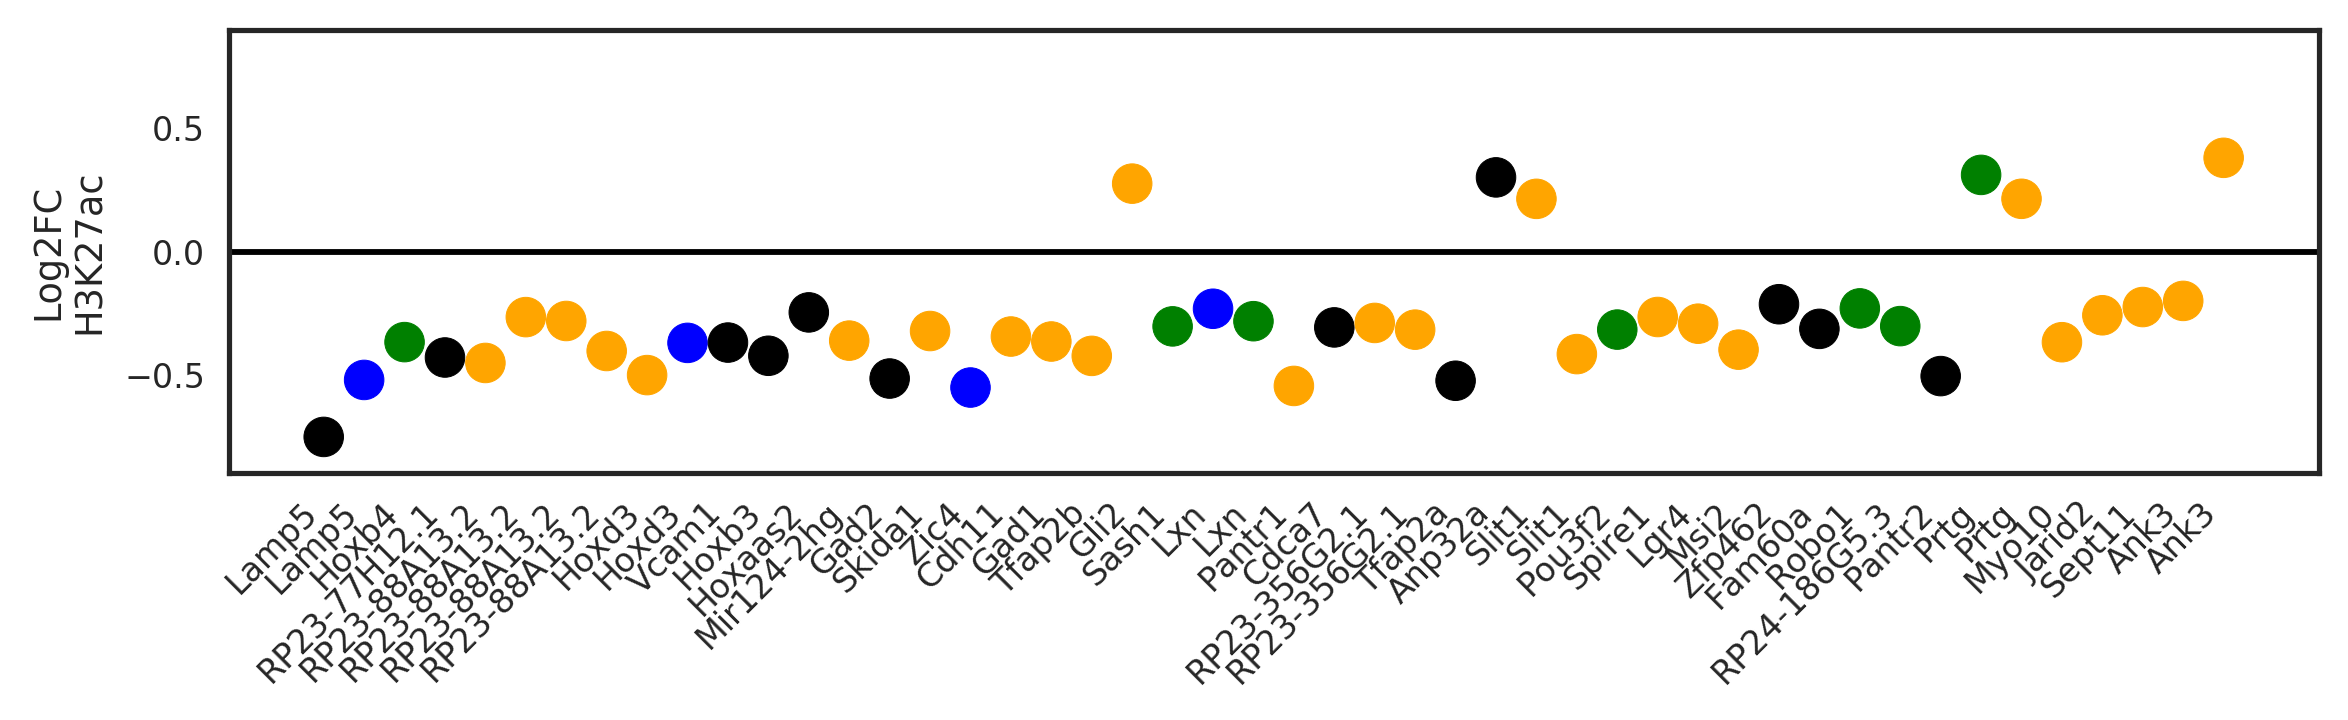

In [52]:
### IDENTIFY DOWNREGULATED GENES ASSOCIATED WITH SIGNIFICANT DECREASE IN ACETYLATION ###

ac_ord.index = ac_ord.homer_genes

fig,ax = plt.subplots(dpi=300, figsize=(8,2.5))
ccc={'promoter-TSS':'k','intron':'orange',"TTS":'b','exon':'g'}
down = exp.loc[(exp.padj<0.05)&(exp.log2FoldChange < 0)].index
# up = exp.loc[(exp.padj<0.1)&(exp.log2FoldChange > 0)].index

sigs_down = ac_ord.loc[down].loc[(ac_ord.loc[down]["pvalue"]<0.1)].drop_duplicates(subset=["peakID"])

ax.scatter(range(sigs_down.shape[0]),sigs_down["log2FoldChange"].values, s=90,alpha=1, color=[ccc[i] for i in sigs_down.Annotation_homer])


ax.set_xticks(range(sigs_down.shape[0]))
ax.set_xticklabels(sigs_down["symbol"], fontsize=8, rotation=45,ha='right')
ax.axhline(0,color='k')
ax.set_ylabel("Log2FC\nH3K27ac")
low = -.9
ax.set_ylim((low,-low))

plt.tight_layout()

# plt.savefig("../FIGURES/deltaH3K27ac_NPC48h_DownGenes.pdf")



# mESC

In [ ]:
%%bash

### compute global scaling factors based on Input representation ###

multiBamSummary BED-file -b /data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep1_Input.filtered.bam \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep2_Input.filtered.bam \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_EPZ_rep1_Input.filtered.bam \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_EPZ_rep2_Input.filtered.bam \
-o ../INTERMEDIATE_FILES/Input/Input_mESC_counts.mat.gz --BED ../../figure_1/INTERMEDIATE_FILES/EnrichedRegions_allMarks_normed_binned.bed \
-bl /home/ferrari/ferrari/my_repository/blacklist_ChIP-Seq/GRCm38_General_readAttractingRegions.UseThisOne_DKFZ.bed \
-p 20 \
--outRawCounts ../INTERMEDIATE_FILES/Input/Input_mESC_counts.counts -e --minMappingQuality 3

In [17]:
inp = pd.read_csv("../INTERMEDIATE_FILES/Input/Input_mESC_counts.counts",sep="\t")
inp = rel.preprocess_deeptools(inp)
rel.RLE(inp)[0]

'mESC_DMSO_rep1_Input.filtered.bam'    1.122561
'mESC_DMSO_rep2_Input.filtered.bam'    1.245745
'mESC_EPZ_rep1_Input.filtered.bam'     0.862461
'mESC_EPZ_rep2_Input.filtered.bam'     0.867088
dtype: float64

In [ ]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K27ac #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_mESC_EPZvsDMSO/info_data_H3K27ac_NPCvsESC.txt ../../figure_1/INTERMEDIATE_FILES/narrow_TSS_dedup.bed ../INTERMEDIATE_FILES/mESC_DIFF_H3K27ac

In [ ]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K4me3 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_mESC_EPZvsDMSO/info_data_H3K4me3_NPCvsESC.txt ../../figure_1/INTERMEDIATE_FILES/narrow_TSS_dedup.bed ../INTERMEDIATE_FILES/mESC_DIFF_H3K4me3

In [ ]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K4me1 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_mESC_EPZvsDMSO/info_data_H3K4me1_NPCvsESC.txt ../../figure_1/INTERMEDIATE_FILES/narrow_TSS_dedup.bed ../INTERMEDIATE_FILES/mESC_DIFF_H3K4me1

In [ ]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K27me3 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_mESC_EPZvsDMSO/info_data_H3K27me3_NPCvsESC.txt ../../figure_1/INTERMEDIATE_FILES/extended_TSS_dedup.bed ../INTERMEDIATE_FILES/mESC_DIFF_H3K27me3

In [ ]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K36me3 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_mESC_EPZvsDMSO/info_data_H3K36me3_NPCvsESC.txt ../../figure_1/INTERMEDIATE_FILES/TES_dedup.bed ../INTERMEDIATE_FILES/mESC_DIFF_H3K36me3

In [ ]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K9me3 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_mESC_EPZvsDMSO/info_data_H3K9me3_NPCvsESC.txt ../../figure_1/INTERMEDIATE_FILES/extended_TSS_dedup.bed ../INTERMEDIATE_FILES/mESC_DIFF_H3K9me3

In [ ]:
%%bash

### PERFORM DESEQ2 DIFFERENTIAL ANALYSIS FOR EACH MARK ###
# H3K79me2 #

./pipe_DiffPeaks.sh ../INPUT_DATA/info_data_mESC_EPZvsDMSO/info_data_H3K79me2_NPCvsESC.txt ../../figure_1/INTERMEDIATE_FILES/extended_TSS_dedup.bed ../INTERMEDIATE_FILES/mESC_DIFF_H3K79me2

# Visualize total association between diff expression and diff acetylation

In [42]:
mESC_exp = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")
mESC_exp.columns=["{}_mESC".format(i) for i in list(mESC_exp)]
NPC48h_exp = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
NPC48h_exp.columns=["{}_NPC48h".format(i) for i in list(NPC48h_exp)]

H3K27ac_mESC_ = pd.read_csv("../INTERMEDIATE_FILES/mESC_peaks_DIFF_H3K27ac/REFERENCE_TABLE_H3K27ac.bed",sep="\t", index_col=8)
H3K27ac_mESC_.columns = ["{}_mESC_epi".format(i) for i in list(H3K27ac_mESC_)]
# H3K27ac_NPC48h_ = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_peaks_DIFF_H3K27ac/REFERENCE_TABLE_H3K27ac.bed", sep="\t", index_col=8)
# H3K27ac_NPC48h_.columns = ["{}_NPC48h_epi".format(i) for i in list(H3K27ac_NPC48h_)]

merged_mESC = pd.merge(H3K27ac_mESC_[["log2FoldChange_mESC_epi", "pvalue_mESC_epi"]], mESC_exp[["log2FoldChange_mESC", "padj_mESC"]], how='right', left_index=True, right_index=True)
merged_mESC = merged_mESC.dropna()

merged_NPC48h = ac_ord.merge(NPC48h_exp, how='right', left_index=True, right_index=True)
merged_NPC48h = merged_NPC48h.dropna().sort_values(by=["padj_NPC48h","pvalue"], ascending=True)

[0.37632799]


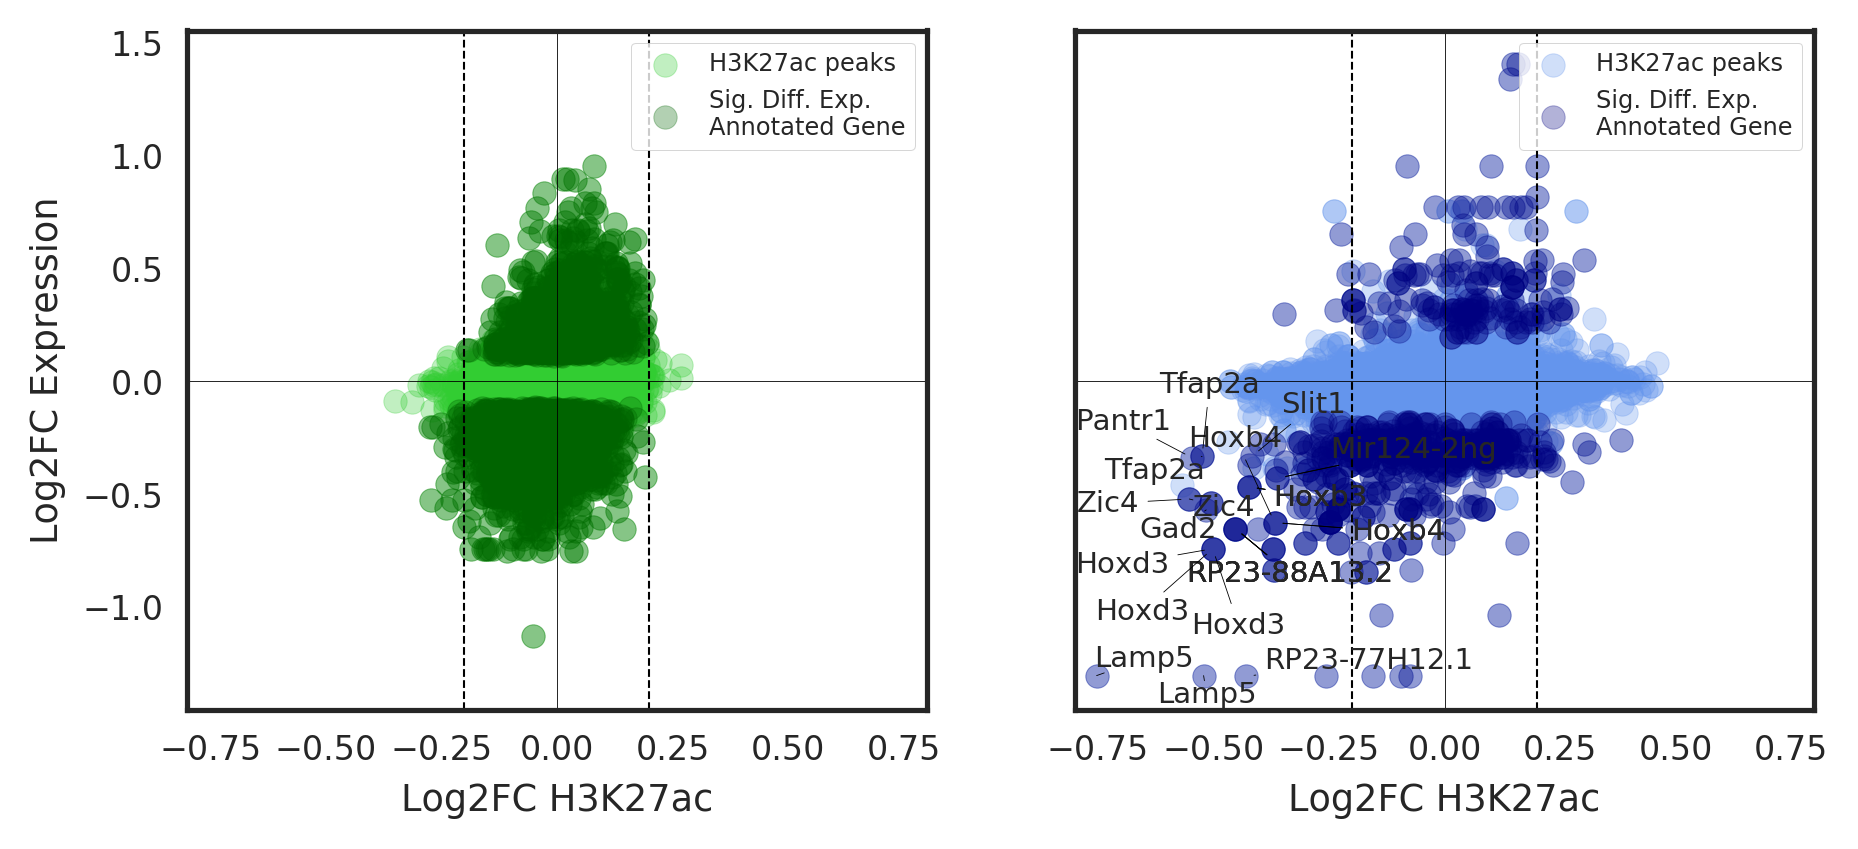

In [53]:
fig,ax=plt.subplots(1,2,dpi=300, figsize=(7,3), sharex=True, sharey=True)
sig_mESC = merged_mESC["padj_mESC"] < 0.05
sig_NPC48h = merged_NPC48h["padj_NPC48h"] < 0.05
ax[0].set_xlim((-0.8,0.8))


X = merged_mESC.log2FoldChange_mESC_epi.to_frame()
y = merged_mESC.log2FoldChange_mESC
reg = LinearRegression().fit(X, y)
reg.score(X, y)
rang = np.arange(-1,1,0.1)
print(reg.coef_)
ax[0].scatter(merged_mESC["log2FoldChange_mESC_epi"],merged_mESC["log2FoldChange_mESC"], alpha=0.3, color='limegreen', label="H3K27ac peaks")
ax[0].scatter(merged_mESC["log2FoldChange_mESC_epi"].loc[sig_mESC],merged_mESC["log2FoldChange_mESC"].loc[sig_mESC], alpha=0.3, color='darkgreen', label="Sig. Diff. Exp.\nAnnotated Gene")
# ax[0].plot(rang, rang*reg.coef_ + reg.intercept_, color='k')
ax[0].axvline(0, linestyle="-", linewidth=0.2, color='k')
ax[0].axvline(-0.2, linestyle="--", linewidth=0.5, color='k')
ax[0].axvline(0.2, linestyle="--", linewidth=0.5, color='k')
ax[0].axhline(0, linestyle="-", linewidth=0.2, color='k')
ax[0].set_xlabel("Log2FC H3K27ac")
ax[0].set_ylabel("Log2FC Expression")




# X = merged_NPC48h.log2FoldChange_NPC48h_epi.to_frame()
# y = merged_NPC48h.log2FoldChange_NPC48h
# reg = LinearRegression().fit(X, y)
# reg.score(X, y)
# rang = np.arange(-1,1,0.1)
# print(reg.coef_)
ax[1].scatter(merged_NPC48h["log2FoldChange"],merged_NPC48h["log2FoldChange_NPC48h"], alpha=0.3, color="cornflowerblue", label="H3K27ac peaks")
ax[1].scatter(merged_NPC48h["log2FoldChange"].loc[sig_NPC48h],merged_NPC48h["log2FoldChange_NPC48h"].loc[sig_NPC48h], alpha=0.3, color='navy', label="Sig. Diff. Exp.\nAnnotated Gene")
# ax[1].plot(rang, rang*reg.coef_ + reg.intercept_, color='k')
ax[1].axvline(0, linestyle="-", linewidth=0.2, color='k')
ax[1].axvline(-0.2, linestyle="--", linewidth=0.5, color='k')
ax[1].axvline(0.2, linestyle="--", linewidth=0.5, color='k')
ax[1].axhline(0, linestyle="-", linewidth=0.2, color='k')
ax[1].set_xlabel("Log2FC H3K27ac")

diff_ = merged_NPC48h.loc[((merged_NPC48h.pvalue < 0.01) & (merged_NPC48h.log2FoldChange < -0.25)) & (merged_NPC48h.padj_NPC48h<0.01)]


texts = [plt.text(diff_["log2FoldChange"].values[i], diff_["log2FoldChange_NPC48h"].values[i], "{}".format(diff_[["symbol_NPC48h"]].values[i][0]), ha='center', va='center',  fontsize=7) for i in range(diff_.shape[0])]
# # texts2 = [plt.text(npc["log2FoldChange"].loc[idx2].values[i], npc["minLogPval"].loc[idx2].values[i], "{}".format(npc[["symbol"]].loc[(npc.padj<padj_thr)&(npc.log2FoldChange>0)].values[i][0]), ha='center', va='center',  fontsize=7) for i in range(len(idx2))]


adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.2))
# adjust_text(texts2, arrowprops=dict(arrowstyle="-", color='k', lw=0.2))

ax[0].legend(fontsize="xx-small", loc=1, frameon=True)
ax[1].legend(fontsize="xx-small", loc=1, frameon=True)

# plt.savefig("../FIGURES/SCATTERPLOT_DiffH3K27ac_DiffExpr.pdf")

In [54]:
print(np.corrcoef(merged_mESC["log2FoldChange_mESC_epi"].values, merged_mESC["log2FoldChange_mESC"].values))
print(np.corrcoef(merged_NPC48h["log2FoldChange"].values, merged_NPC48h["log2FoldChange_NPC48h"].values))

[[1.         0.18771924]
 [0.18771924 1.        ]]
[[1.         0.16560801]
 [0.16560801 1.        ]]
